In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
import zipfile
with zipfile.ZipFile('/content/archive (34).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/rice_dataset')

import os
os.listdir('/content/rice_dataset')


['Rice_Image_Dataset']

In [10]:
import os
os.listdir('/content/rice_dataset')


dataset_path = '/content/rice_dataset/Rice_Image_Dataset'
os.listdir(dataset_path)  # This should now show the actual rice class folders


['Basmati',
 'Ipsala',
 'Jasmine',
 'Karacadag',
 'Arborio',
 'Rice_Citation_Request.txt']

In [34]:
dataset_path = '/content/rice_dataset/Rice_Image_Dataset'
classes = ['Basmati','Ipsala','Jasmine','Karacadag','Arborio',]

for cls in classes:
    path = os.path.join(dataset_path, cls)
    images = [f for f in os.listdir(path) if f.endswith('.jpg')]
    print(cls, "has", len(images), "images")


Basmati has 15000 images
Ipsala has 15000 images
Jasmine has 15000 images
Karacadag has 15000 images
Arborio has 15000 images


In [35]:
import cv2
from google.colab.patches import cv2_imshow

dataset_path = '/content/rice_dataset/Rice_Image_Dataset'

features = []

for cls in classes:
    path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(path):
      if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)

            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray, (5,5), 0)

            _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if len(contours) == 0:
                continue

            c = max(contours, key=cv2.contourArea)  # Take largest contour

            area = cv2.contourArea(c)
            perimeter = cv2.arcLength(c, True)
            x,y,w,h = cv2.boundingRect(c)
            aspect_ratio = float(w)/h
            mean_color = np.mean(gray)

            features.append([area, perimeter, aspect_ratio, mean_color, cls])

df = pd.DataFrame(features, columns=['area(px)','perimeter(px)','aspect_ratio','mean_color','Name_of_rice'])
df.to_csv('rice_features.csv', index=False)
print("Feature extraction complete. CSV saved as rice_features.csv")
df.head()


Feature extraction complete. CSV saved as rice_features.csv


,area(px),perimeter(px),aspect_ratio,mean_color,Name_of_rice
0,7194.0,448.925969,1.107143,25.784800,Basmati
1,6000.0,375.788884,0.702899,21.516560,Basmati
2,7606.0,444.759447,1.757576,27.311440,Basmati
3,7148.5,444.977703,2.671429,26.393632,Basmati
4,6800.0,432.450792,3.280702,25.658592,Basmati


In [13]:
#Hence we got the pure dataset from the images

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area(px)       75000 non-null  float64
 1   perimeter(px)  75000 non-null  float64
 2   aspect_ratio   75000 non-null  float64
 3   mean_color     75000 non-null  float64
 4   Name_of_rice   75000 non-null  object 
dtypes: float64(4), object(1)
memory usage: 2.9+ MB


In [37]:
df.describe()

,area(px),perimeter(px),aspect_ratio,mean_color
count,75000.000000,75000.000000,75000.000000,75000.000000
mean,8182.075727,396.375251,1.208531,30.351072
std,3093.587764,73.899578,0.738707,12.723163
min,3792.500000,277.178713,0.193548,13.526976
25%,6089.375000,331.580734,0.657895,21.465864
50%,7146.250000,367.989895,1.020833,25.910000
75%,8671.250000,466.440685,1.569444,32.332484
max,20730.000000,623.244729,5.435897,82.198064


In [38]:
df.head()

,area(px),perimeter(px),aspect_ratio,mean_color,Name_of_rice
0,7194.0,448.925969,1.107143,25.784800,Basmati
1,6000.0,375.788884,0.702899,21.516560,Basmati
2,7606.0,444.759447,1.757576,27.311440,Basmati
3,7148.5,444.977703,2.671429,26.393632,Basmati
4,6800.0,432.450792,3.280702,25.658592,Basmati


In [39]:
df.tail(10)

,area(px),perimeter(px),aspect_ratio,mean_color,Name_of_rice
74990,6761.5,353.404108,1.365591,23.995168,Arborio
74991,7464.0,368.333040,1.511111,27.163616,Arborio
74992,7847.0,364.818322,0.751938,26.532864,Arborio
74993,8145.5,378.433547,0.696296,30.004592,Arborio
74994,7930.0,376.333041,1.544444,29.558480,Arborio
74995,7394.0,356.450791,2.218750,27.863968,Arborio
74996,6685.0,348.960457,0.905172,24.231296,Arborio
74997,7688.0,363.563489,0.553957,26.911520,Arborio
74998,7369.5,355.320848,0.598485,26.781872,Arborio
74999,7403.5,361.060963,1.278351,25.664064,Arborio


<Axes: >

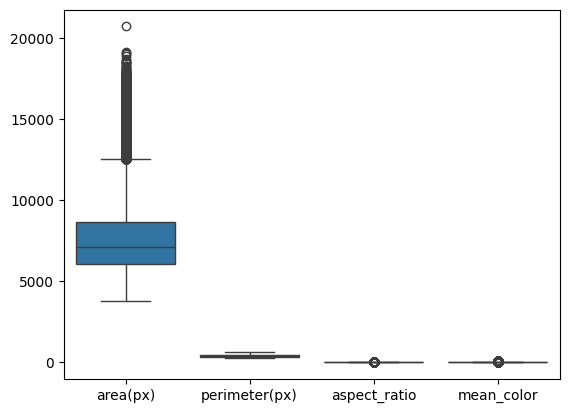

In [40]:
# Hence there are no null values

import seaborn as sns

sns.boxplot(df)

In [41]:
df['Name_of_rice'].value_counts()

,count
Name_of_rice,
Basmati,15000
Ipsala,15000
Jasmine,15000
Karacadag,15000
Arborio,15000


In [42]:
df.head(10)

,area(px),perimeter(px),aspect_ratio,mean_color,Name_of_rice
0,7194.0,448.925969,1.107143,25.784800,Basmati
1,6000.0,375.788884,0.702899,21.516560,Basmati
2,7606.0,444.759447,1.757576,27.311440,Basmati
3,7148.5,444.977703,2.671429,26.393632,Basmati
4,6800.0,432.450792,3.280702,25.658592,Basmati
5,6738.5,407.178713,3.017241,24.839936,Basmati
6,7767.5,449.722870,0.262626,28.967168,Basmati
7,7176.5,417.428493,1.371681,26.788240,Basmati
8,6651.0,418.534051,0.427746,24.779328,Basmati
9,8276.5,465.428494,0.649718,31.051648,Basmati


<Axes: >

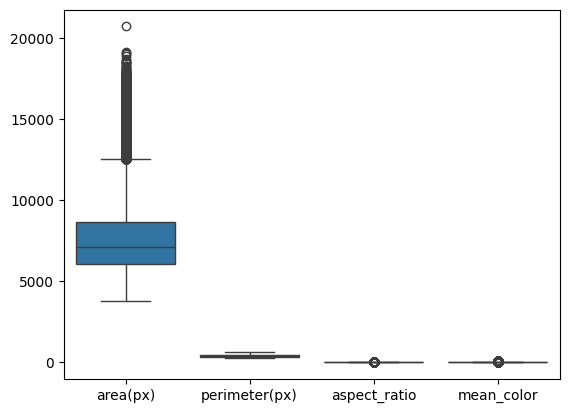

In [43]:
sns.boxplot(df)

In [44]:
df.head(10)

,area(px),perimeter(px),aspect_ratio,mean_color,Name_of_rice
0,7194.0,448.925969,1.107143,25.784800,Basmati
1,6000.0,375.788884,0.702899,21.516560,Basmati
2,7606.0,444.759447,1.757576,27.311440,Basmati
3,7148.5,444.977703,2.671429,26.393632,Basmati
4,6800.0,432.450792,3.280702,25.658592,Basmati
5,6738.5,407.178713,3.017241,24.839936,Basmati
6,7767.5,449.722870,0.262626,28.967168,Basmati
7,7176.5,417.428493,1.371681,26.788240,Basmati
8,6651.0,418.534051,0.427746,24.779328,Basmati
9,8276.5,465.428494,0.649718,31.051648,Basmati


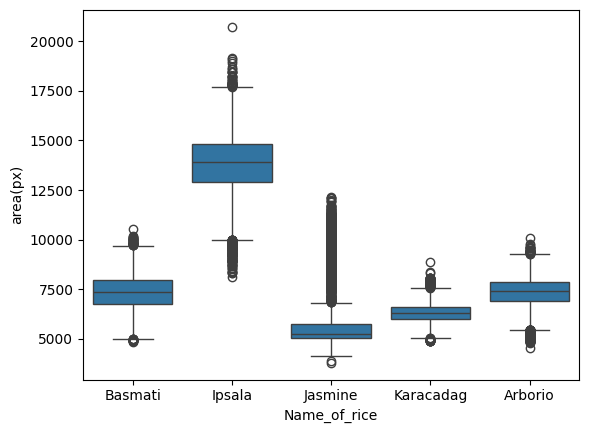

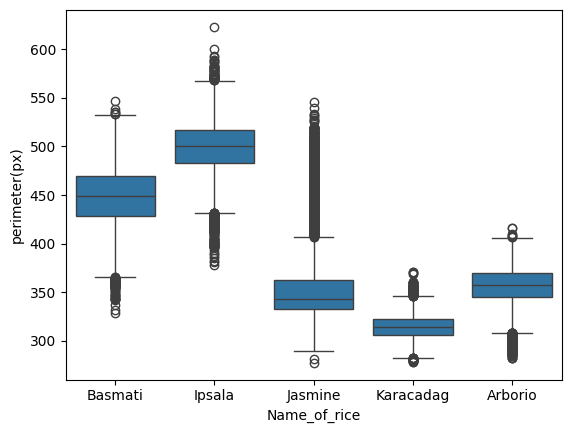

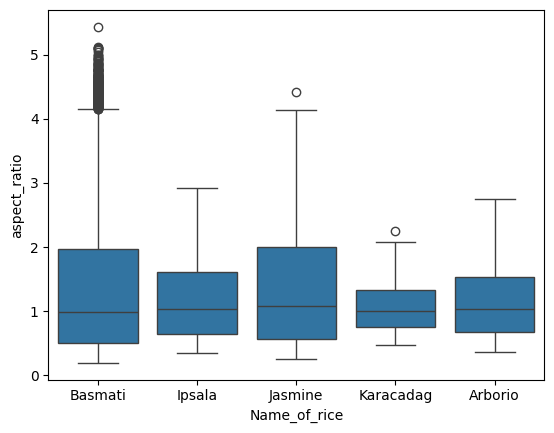

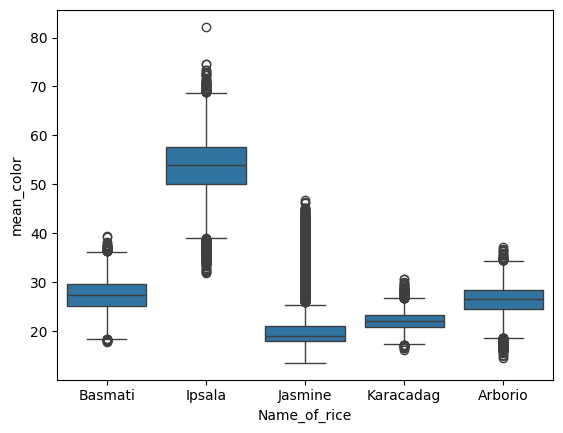

Accuracy: 0.9625333333333334

Confusion Matrix:


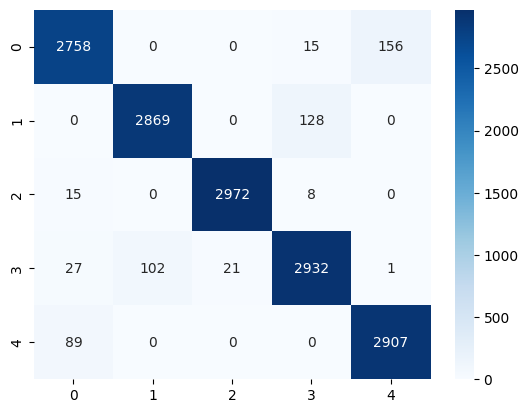


Classification Report:
               precision    recall  f1-score   support

     Arborio       0.95      0.94      0.95      2929
     Basmati       0.97      0.96      0.96      2997
      Ipsala       0.99      0.99      0.99      2995
     Jasmine       0.95      0.95      0.95      3083
   Karacadag       0.95      0.97      0.96      2996

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



In [49]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



features = ['area(px)','perimeter(px)','aspect_ratio','mean_color']
for feature in features:
    sns.boxplot(x='Name_of_rice', y=feature, data=df)
    plt.show()

X = df[features]
y = df['Name_of_rice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [52]:
import joblib
print("\nSaving model to 'rice_model.joblib'...")
joblib.dump(model, 'rice_model.pkl')

print("Saving scaler to 'scaler.pkl'...")
joblib.dump(scaler, 'scaler.pkl')


Saving model to 'rice_model.joblib'...
Saving scaler to 'scaler.pkl'...


['scaler.pkl']

Accuracy: 0.9725333333333334


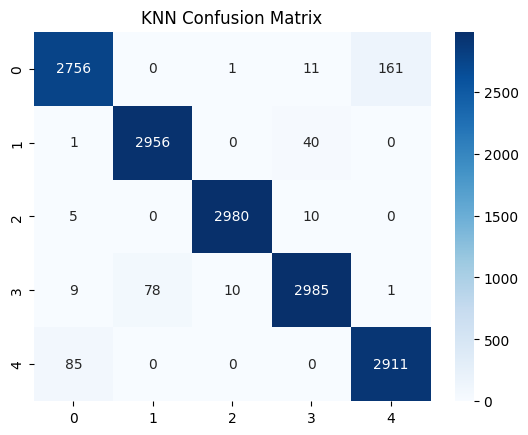

              precision    recall  f1-score   support

     Arborio       0.96      0.94      0.95      2929
     Basmati       0.97      0.99      0.98      2997
      Ipsala       1.00      0.99      1.00      2995
     Jasmine       0.98      0.97      0.97      3083
   Karacadag       0.95      0.97      0.96      2996

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



In [46]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))


Accuracy: 0.9632666666666667


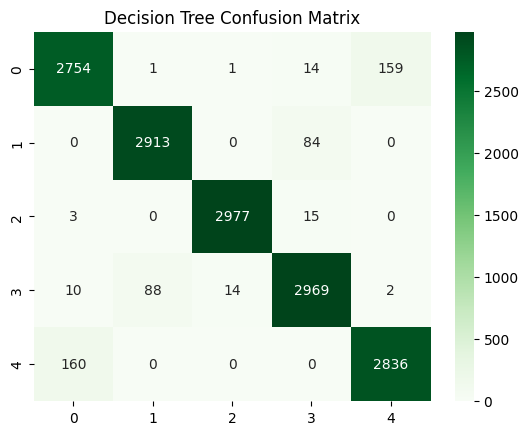

              precision    recall  f1-score   support

     Arborio       0.94      0.94      0.94      2929
     Basmati       0.97      0.97      0.97      2997
      Ipsala       0.99      0.99      0.99      2995
     Jasmine       0.96      0.96      0.96      3083
   Karacadag       0.95      0.95      0.95      2996

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

Accuracy: 0.9736666666666667


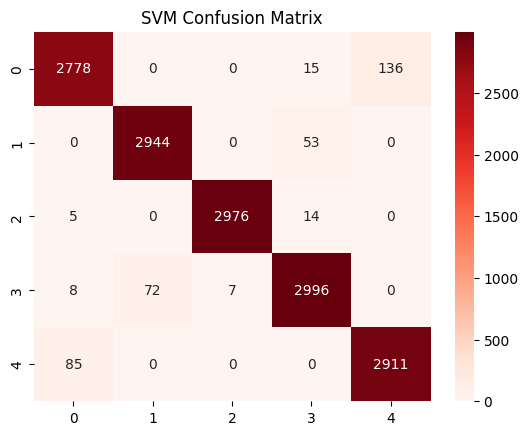

              precision    recall  f1-score   support

     Arborio       0.97      0.95      0.96      2929
     Basmati       0.98      0.98      0.98      2997
      Ipsala       1.00      0.99      1.00      2995
     Jasmine       0.97      0.97      0.97      3083
   Karacadag       0.96      0.97      0.96      2996

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



In [48]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

In [26]:
import pandas as pd
import numpy as np

new_rice_values = [[7000, 345, 1.5, 28]]

new_rice_df = pd.DataFrame(new_rice_values, columns=['area(px)','perimeter(px)','aspect_ratio','mean_color'])

new_rice_scaled = scaler.transform(new_rice_df)

# Predict
prediction = model.predict(new_rice_scaled)
print("Predicted rice type:", prediction[0])


Predicted rice type: Arborio
